In [1]:
import pandas as pd

df = pd.read_csv('Data/reviews.csv', encoding="ISO-8859-1")
df = df.sample(frac=1, random_state=0)
df.head()

,Text,Sentiment
11841,Al Pacino was once an actor capable of making ...,0
19602,After Chaplin made one of his best films: Doug...,0
45519,This movie is sort of a Carrie meets Heavy Met...,1
25747,I have fond memories of watching this visually...,1
42642,"In the '70s, Charlton Heston starred in sci-fi...",1


In [2]:
df = df.drop_duplicates()
df.groupby('Sentiment').describe()

Text                                                            \
           count unique                                                top   
Sentiment                                                                    
0          24697  24697  Stanley Kubrick, a director who I hold in the ...   
1          24884  24884  Fairly funny Jim Carrey vehicle that has him a...   

                
          freq  
Sentiment       
0            1  
1            1

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.layers import TextVectorization, InputLayer
import tensorflow as tf

max_words= 20000
max_length= 500
 
model = Sequential()
model.add(InputLayer(input_shape=(1,), dtype=tf.string))
model.add(TextVectorization(max_tokens=max_words, output_sequence_length=max_length))
model.add(Embedding(max_words, 32, input_length=max_length, mask_zero=True))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 500)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 500, 32)           640000    
                                                                 
 flatten (Flatten)           (None, 16000)             0         
                                                                 
 dense (Dense)               (None, 128)               2048128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2,688,257
Trainable params: 2,688,257
Non-trainable params: 0
______________________________________________

In [4]:
x = df['Text']
y = df['Sentiment']
model.layers[0].adapt(x)

hist = model.fit(x, y, validation_split=0.2, epochs=5, batch_size=250)

Epoch 1/5
159/159 [==============================] - 6s 36ms/step - loss: 0.4697 - accuracy: 0.7564 - val_loss: 0.2824 - val_accuracy: 0.8793
Epoch 2/5
159/159 [==============================] - 6s 36ms/step - loss: 0.1564 - accuracy: 0.9427 - val_loss: 0.2870 - val_accuracy: 0.8834
Epoch 3/5
159/159 [==============================] - 6s 36ms/step - loss: 0.0361 - accuracy: 0.9920 - val_loss: 0.3735 - val_accuracy: 0.8793
Epoch 4/5
159/159 [==============================] - 6s 37ms/step - loss: 0.0071 - accuracy: 0.9992 - val_loss: 0.4168 - val_accuracy: 0.8781
Epoch 5/5
159/159 [==============================] - 6s 38ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 0.4533 - val_accuracy: 0.8790


[]

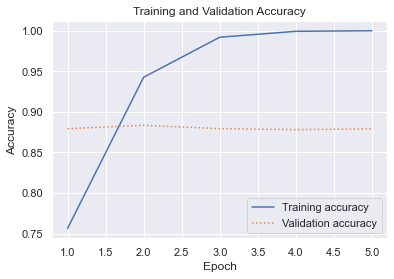

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [6]:
text = 'Excellent food and fantastic service!'
model.predict([text])[0][0]

0.99744606

In [7]:
text = 'The long lines and poor customer service really turned me off.'
model.predict([text])[0][0]

0.08932105

In [8]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()
model.add(InputLayer(input_shape=(1,), dtype=tf.string))
model.add(TextVectorization(max_tokens=max_words, output_sequence_length=max_length))
model.add(Embedding(max_words, 32, input_length=max_length, mask_zero=True))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary(line_length=100)

Model: "sequential_1"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 text_vectorization_1 (TextVectorization)    (None, 500)                             0              
                                                                                                    
 embedding_1 (Embedding)                     (None, 500, 32)                         640000         
                                                                                                    
 conv1d (Conv1D)                             (None, 494, 32)                         7200           
                                                                                                    
 max_pooling1d (MaxPooling1D)                (None, 98, 32)                          0              
                                                                     

In [9]:
model.layers[0].adapt(x)
hist = model.fit(x, y, validation_split=0.2, epochs=5, batch_size=250)

Epoch 1/5
159/159 [==============================] - 12s 75ms/step - loss: 0.4658 - accuracy: 0.7615 - val_loss: 0.2777 - val_accuracy: 0.8820
Epoch 2/5
159/159 [==============================] - 18s 113ms/step - loss: 0.2085 - accuracy: 0.9188 - val_loss: 0.2660 - val_accuracy: 0.8901
Epoch 3/5
159/159 [==============================] - 17s 109ms/step - loss: 0.1259 - accuracy: 0.9552 - val_loss: 0.2989 - val_accuracy: 0.8872
Epoch 4/5
159/159 [==============================] - 16s 100ms/step - loss: 0.0722 - accuracy: 0.9778 - val_loss: 0.3615 - val_accuracy: 0.8830
Epoch 5/5
159/159 [==============================] - 16s 103ms/step - loss: 0.0354 - accuracy: 0.9912 - val_loss: 0.4295 - val_accuracy: 0.8827


[]

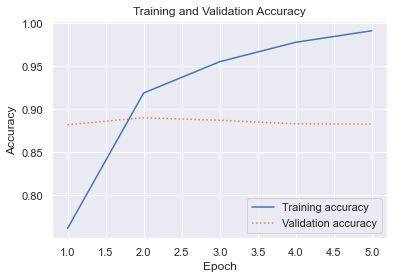

In [10]:
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [11]:
from tensorflow.keras.layers import Layer, Embedding

class PositionalEmbedding(Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)
        self.token_embeddings = Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

In [12]:
model = Sequential()
model.add(InputLayer(input_shape=(1,), dtype=tf.string))
model.add(TextVectorization(max_tokens=max_words, output_sequence_length=max_length))
model.add(PositionalEmbedding(sequence_length=max_length, vocab_size=max_words, embed_dim=32))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary(line_length=100)

Model: "sequential_2"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 text_vectorization_2 (TextVectorization)    (None, 500)                             0              
                                                                                                    
 positional_embedding (PositionalEmbedding)  (None, 500, 32)                         656000         
                                                                                                    
 flatten_1 (Flatten)                         (None, 16000)                           0              
                                                                                                    
 dense_4 (Dense)                             (None, 128)                             2048128        
                                                                     

In [13]:
model.layers[0].adapt(x)
hist = model.fit(x, y, validation_split=0.2, epochs=5, batch_size=250)

Epoch 1/5
159/159 [==============================] - 7s 39ms/step - loss: 0.5475 - accuracy: 0.6947 - val_loss: 0.3075 - val_accuracy: 0.8722
Epoch 2/5
159/159 [==============================] - 7s 47ms/step - loss: 0.2331 - accuracy: 0.9081 - val_loss: 0.2644 - val_accuracy: 0.8938
Epoch 3/5
159/159 [==============================] - 8s 49ms/step - loss: 0.1159 - accuracy: 0.9635 - val_loss: 0.2786 - val_accuracy: 0.8931
Epoch 4/5
159/159 [==============================] - 8s 47ms/step - loss: 0.0440 - accuracy: 0.9911 - val_loss: 0.3187 - val_accuracy: 0.8916
Epoch 5/5
159/159 [==============================] - 7s 47ms/step - loss: 0.0148 - accuracy: 0.9984 - val_loss: 0.3558 - val_accuracy: 0.8914


[]

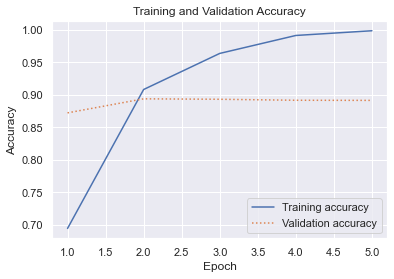

In [14]:
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()